In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#let's create a function to extract the compounds tails and get counts for each domain-specific tables
def process_tails(file_path, category):
    
    #Import human, rodent, mirobes, foods and plant-related datasets after all the 0.7 cosine filters
    data = pd.read_csv(file_path, sep='\t')
    
    #and split by '-' to get the tails, count occurrences, add the category column
    tails = [tail.split('-')[-1] for tail in data['group_annotation'].unique()]
    
    #create a dataframe to count occurrences
    df = pd.DataFrame(tails, columns=['Tail'])
    df_count = df['Tail'].value_counts().reset_index()
    df_count.columns = ['Tail', 'Count']
    df_count['Category'] = category
    
    return df_count

# File paths and categories
datasets = [
    ('/.../humans_all_heads_matches_cos07_ReDU_unfiltered07.tsv', 'Humans'),
    ('/.../rodents_all_heads_matches_cos07_ReDU_unfiltered07.tsv', 'Rodents'),
    ('/.../all_heads_microbes_after_all_filters.tsv', 'Microbes'),
    ('/.../all_heads_foods_after_all_filters.tsv', 'Foods'),
    ('/.../all_heads_plants_after_all_filters.tsv', 'Plants')
]

# Process all datasets and concatenate results vertically
df_all = pd.concat([process_tails(path, category) for path, category in datasets], axis=0)

In [31]:
#and another function to classify the different chain lengths


# 1 - define the lists for each group based on the 'Tail' column values
short_tails = ['C2:', 'C3:', 'C4:', 'C5:', 'C6:']
medium_tails = ['C7:', 'C8:', 'C9:', 'C10:', 'C11:', 'C12:']
long_tails = ['C13:', 'C14:', 'C15:', 'C16:', 'C17:', 'C18:', 'C19:', 'C20:', 'C21:']
very_long_tails = ['C22:', 'C23:', 'C24:', 'C25:', 'C26:', 'C27:', 'C28:', 'C29:', 'C30:']

# 2 - write a function to categorize based on the 'Tail' column
def assign_group(tail):
    if any(tail.startswith(prefix) for prefix in short_tails):
        return 'Short'
    elif any(tail.startswith(prefix) for prefix in medium_tails):
        return 'Medium'
    elif any(tail.startswith(prefix) for prefix in long_tails):
        return 'Long'
    elif any(tail.startswith(prefix) for prefix in very_long_tails):
        return 'Very long'
    else:
        return

df_all['Group'] = df_all['Tail'].apply(assign_group)
df_all

In [58]:
# now we need to group by 'Group' and 'Category' and sum the 'Count' values
df_grouped = df_all.groupby(['Group', 'Category'])['Count'].sum().reset_index()
df_grouped

# Creating the 'Order' column and sorting it
group_order = {'Short': 1, 'Medium': 2, 'Long': 3, 'Very long': 4}
df_grouped['Order'] = df_grouped['Group'].map(group_order)
df_grouped = df_grouped.sort_values(by=['Order', 'Count'], ascending=[True, False])
df_grouped

,Group,Category,Count,Order
11,Short,Humans,110,1
14,Short,Rodents,75,1
12,Short,Microbes,60,1
10,Short,Foods,33,1
13,Short,Plants,33,1
6,Medium,Humans,106,2
7,Medium,Microbes,87,2
5,Medium,Foods,43,2
8,Medium,Plants,29,2
9,Medium,Rodents,26,2


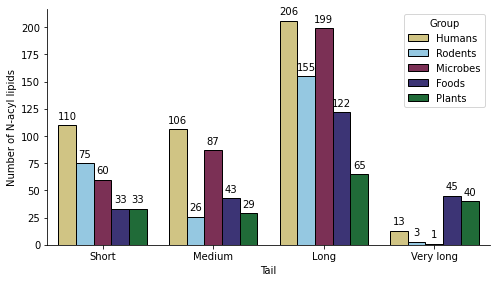

In [62]:
# and create the bar plot

# Color palette
palette = {
    'Humans': '#DDCC77',
    'Rodents': '#88CCEE',
    'Microbes': '#882355',
    'Foods': '#342980',
    'Plants': '#137834'
}

# create the grouped bar plot
plt.figure(figsize=(7, 4))
barplot = sns.barplot(data=df_grouped, x='Group', y='Count', hue='Category', width=0.8,
                      palette=palette, edgecolor='black')
plt.xlabel('Tail')
plt.ylabel('Number of N-acyl lipids')
plt.legend(title='Group')
plt.xticks(rotation=0)
plt.tight_layout()

# add numbers above each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('/.../Figure_2d.pdf')
plt.show()
